# COVID-19 Data - Ventilator

# Get Data

In [ ]:
import pandas as pd
import numpy as np
import io
import pickle

from google.colab import files
 
uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded['covid_data.csv']))

Saving covid_data.csv to covid_data (6).csv


# Filter and Visualize Data

In [ ]:
data.columns

Index(['Age', 'SEX', 'RACE_categ', 'BMI', 'death', 'Vented', 'Alcohol_abuse',
       'Smoker', 'HTN', 'HLD', 'DM', 'CAD', 'PAD', 'HF', 'AF',
       'ESRD, on chronic dialysis', 'VTE', 'Cirrhosis',
       'Chronic liver disease', 'CTD/AI disease', 'Chronic resp failure',
       'Chronic lung disease', 'Creat_max', 'CRP_max', 'Ddimer_max', 'Plt_min',
       'TBili_max'],
      dtype='object')

In [ ]:
data.dtypes

Age                          float64
SEX                           object
RACE_categ                     int64
BMI                          float64
death                          int64
Vented                         int64
Alcohol_abuse                  int64
Smoker                         int64
HTN                            int64
HLD                            int64
DM                             int64
CAD                            int64
PAD                            int64
HF                             int64
AF                             int64
ESRD, on chronic dialysis      int64
VTE                            int64
Cirrhosis                      int64
Chronic liver disease          int64
CTD/AI disease                 int64
Chronic resp failure           int64
Chronic lung disease           int64
Creat_max                    float64
CRP_max                      float64
Ddimer_max                   float64
Plt_min                      float64
TBili_max                    float64
d

In [ ]:
data = data.drop(['PAD', 'AF', 'ESRD, on chronic dialysis', 'VTE', 'Cirrhosis', 'Chronic liver disease', 'CTD/AI disease', 'Chronic resp failure'], axis=1)

In [ ]:
data.describe()

,Age,RACE_categ,BMI,death,Vented,Alcohol_abuse,Smoker,HTN,HLD,DM,CAD,HF,Chronic lung disease,Creat_max,CRP_max,Ddimer_max,Plt_min,TBili_max
count,3491.000000,3491.000000,3380.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,2389.000000,1917.000000,1408.000000,2405.000000,2288.000000
mean,64.320395,1.509023,31.702580,0.144944,0.183901,0.985964,1.118018,0.519049,0.104555,0.288742,0.121742,0.078201,0.220854,2.321272,144.682681,2552.371449,199.013306,0.884047
std,17.539023,0.628471,8.781211,0.352095,0.387459,0.683475,0.798167,0.499709,0.306022,0.453243,0.327034,0.268526,0.421731,2.962233,105.271884,2317.062097,91.051021,1.441509
min,0.000000,0.000000,12.910000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.180000,0.200000,253.000000,2.000000,0.100000
25%,52.666667,1.000000,25.790000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.940000,60.800000,793.000000,141.000000,0.500000
50%,65.250000,2.000000,30.410000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.270000,122.600000,1494.000000,185.000000,0.600000
75%,77.291667,2.000000,36.282500,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.210000,215.900000,4015.250000,242.000000,0.900000
max,103.666667,3.000000,103.920000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,29.920000,748.700000,9868.000000,681.000000,40.100000


In [ ]:
# Convert null values to average of column - dont want to just lose data
columns = ['BMI', 'Creat_max', 'CRP_max', 'Ddimer_max', 'Plt_min', 'TBili_max']
for col in columns:
  data[col] = data[col].fillna(data[col].mean())


In [ ]:
data.describe()

,Age,RACE_categ,BMI,death,Vented,Alcohol_abuse,Smoker,HTN,HLD,DM,CAD,HF,Chronic lung disease,Creat_max,CRP_max,Ddimer_max,Plt_min,TBili_max
count,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000
mean,64.320395,1.509023,31.702580,0.144944,0.183901,0.985964,1.118018,0.519049,0.104555,0.288742,0.121742,0.078201,0.220854,2.321272,144.682681,2552.371449,199.013306,0.884047
std,17.539023,0.628471,8.640439,0.352095,0.387459,0.683475,0.798167,0.499709,0.306022,0.453243,0.327034,0.268526,0.421731,2.450325,78.000509,1471.200989,75.568246,1.166911
min,0.000000,0.000000,12.910000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.180000,0.200000,253.000000,2.000000,0.100000
25%,52.666667,1.000000,25.905000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.080000,110.250000,2127.000000,160.000000,0.600000
50%,65.250000,2.000000,30.730000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.040000,144.682681,2552.371449,199.013306,0.884047
75%,77.291667,2.000000,36.040000,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.321272,144.682681,2552.371449,212.000000,0.884047
max,103.666667,3.000000,103.920000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,29.920000,748.700000,9868.000000,681.000000,40.100000


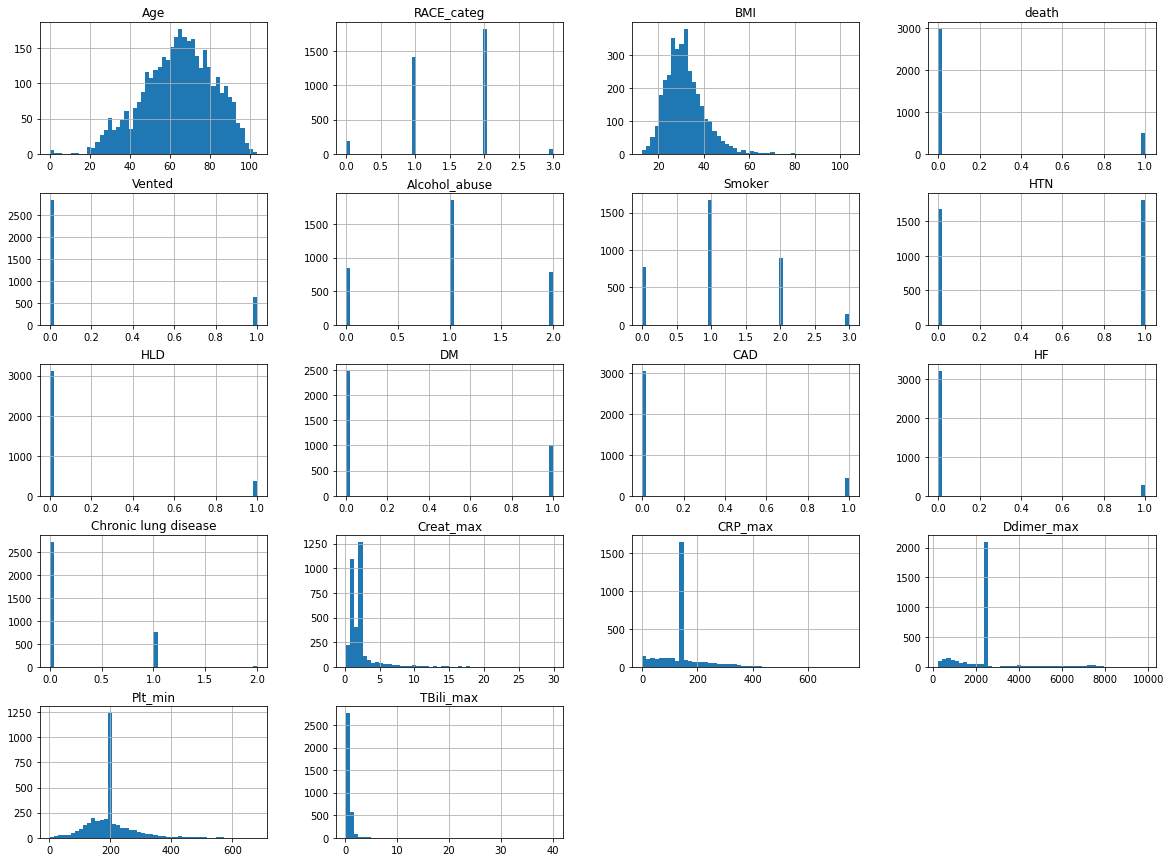

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

data.hist(bins = 50, figsize = (20,15))
plt.show()

In [ ]:
# Filter data - get rid of outliers
filteredData = data[data['Creat_max'] < 30]
filteredData = filteredData[filteredData['CRP_max'] < 600]
filteredData = filteredData[filteredData['Ddimer_max'] < 8000]
filteredData = filteredData[filteredData['Plt_min'] < 600]
filteredData = filteredData[filteredData['TBili_max'] < 40]
filteredData = filteredData[filteredData['BMI'] < 80]
filteredData = filteredData[filteredData['Age'] > 10]

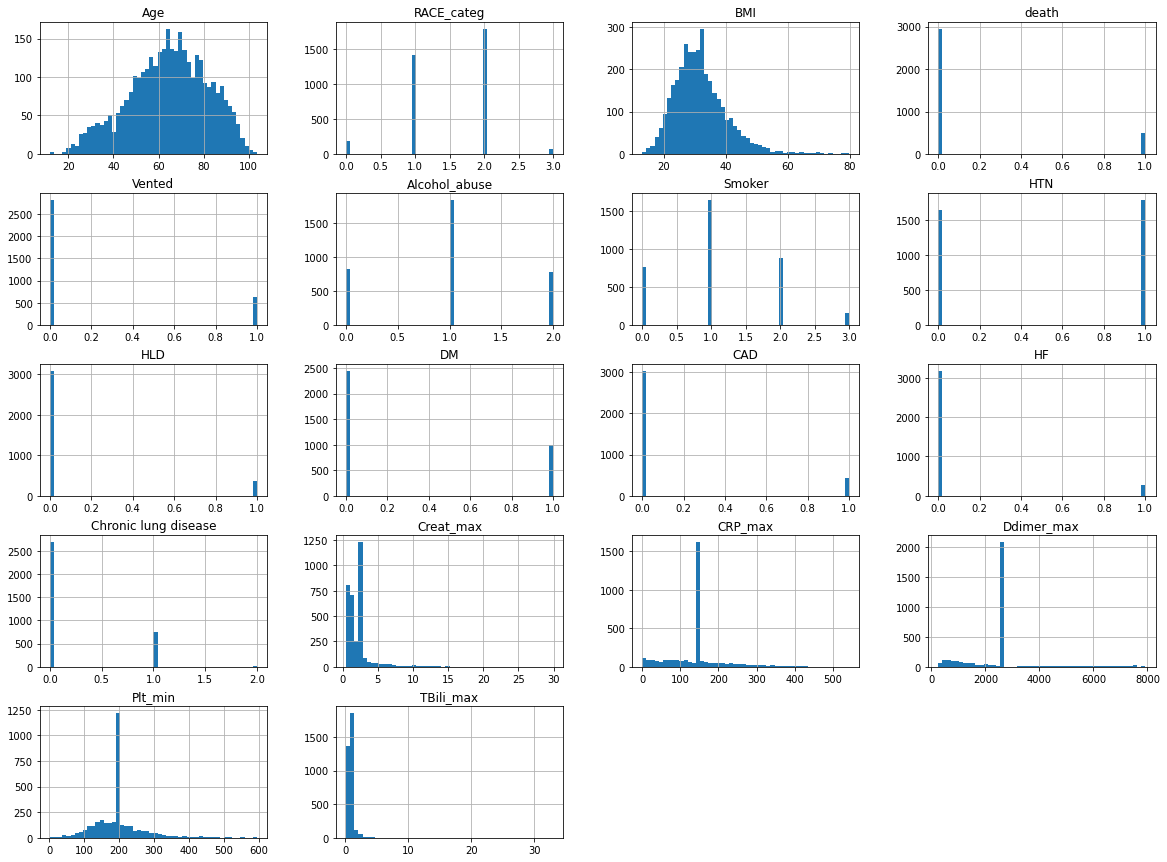

In [ ]:
filteredData.hist(bins = 50, figsize = (20,15))
plt.show()

In [ ]:
filteredData.count()

Age                     3452
SEX                     3452
RACE_categ              3452
BMI                     3452
death                   3452
Vented                  3452
Alcohol_abuse           3452
Smoker                  3452
HTN                     3452
HLD                     3452
DM                      3452
CAD                     3452
HF                      3452
Chronic lung disease    3452
Creat_max               3452
CRP_max                 3452
Ddimer_max              3452
Plt_min                 3452
TBili_max               3452
dtype: int64

In [ ]:
vented = filteredData[filteredData['Vented'] == 1]
not_vented = filteredData[filteredData['Vented'] == 0]
alive = filteredData[filteredData['death'] == 0]
died = filteredData[filteredData['death'] == 1]

# Model - All Patients

In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [ ]:
X = filteredData.drop(columns = ['death', 'SEX'])
y = filteredData['death']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier()

In [ ]:
booster = model.get_booster()
booster.save_model('all_patients_model.bin')

In [ ]:
expected_y  = y_test
predicted_y = model.predict(X_test)

In [ ]:
print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       895
           1       0.55      0.43      0.49       141

    accuracy                           0.88      1036
   macro avg       0.73      0.69      0.71      1036
weighted avg       0.86      0.88      0.87      1036

[[846  49]
 [ 80  61]]


In [ ]:
print(model.predict(X_test))
print(model.predict_proba(X_test))

secondrow = pd.DataFrame(X_test.iloc[5]).T
print(secondrow)
#secondpred = model.predict(secondrow)
#print(secondpred)


[0 0 0 ... 1 0 0]
[[0.99491364 0.00508634]
 [0.5684743  0.4315257 ]
 [0.8846653  0.11533467]
 ...
 [0.4777078  0.5222922 ]
 [0.9970723  0.0029277 ]
 [0.9969682  0.00303177]]
           Age  RACE_categ   BMI  Vented  Alcohol_abuse  Smoker  HTN  HLD  \
644  74.916667         2.0  28.6     0.0            0.0     0.0  0.0  0.0   

      DM  CAD   HF  Chronic lung disease  Creat_max  CRP_max   Ddimer_max  \
644  0.0  0.0  0.0                   0.0        1.5    191.0  2552.371449   

     Plt_min  TBili_max  
644    222.0        0.5  


In [ ]:
model.feature_importances_

array([0.1057447 , 0.02881281, 0.03219336, 0.40560293, 0.03515386,
       0.01826305, 0.0349107 , 0.03618886, 0.        , 0.03128411,
       0.02628964, 0.03240597, 0.05397418, 0.04328313, 0.03172011,
       0.05402185, 0.03015066], dtype=float32)

Text(0.5, 1.0, 'Feature Importance')

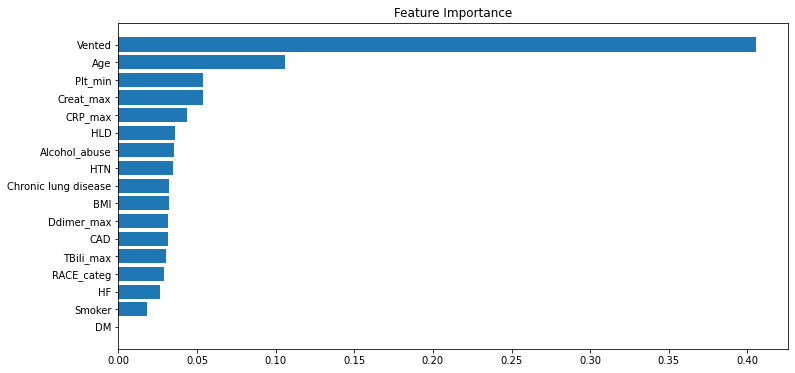

In [ ]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

# Model - Vented Patients

In [ ]:
X = vented.drop(columns = ['death', 'SEX', 'Vented'])
y = vented['death']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier()

In [ ]:
booster = model.get_booster()
booster.save_model('vented_model.bin')

In [ ]:
expected_y  = y_test
predicted_y = model.predict(X_test)

In [ ]:
print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))

              precision    recall  f1-score   support

           0       0.62      0.58      0.60        91
           1       0.63      0.67      0.65        98

    accuracy                           0.63       189
   macro avg       0.63      0.63      0.63       189
weighted avg       0.63      0.63      0.63       189

[[53 38]
 [32 66]]


In [ ]:
print(model.predict(X_test))
print(model.predict_proba(X_test))

[0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0
 1 0 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1
 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1
 1 1 1 0]
[[0.60863566 0.39136434]
 [0.55731833 0.44268164]
 [0.45883912 0.5411609 ]
 [0.8488577  0.15114228]
 [0.59451365 0.40548638]
 [0.42561114 0.57438886]
 [0.59677255 0.40322742]
 [0.5698769  0.43012312]
 [0.26958978 0.7304102 ]
 [0.12136841 0.8786316 ]
 [0.5429235  0.4570765 ]
 [0.8631954  0.13680458]
 [0.47649002 0.52351   ]
 [0.8153839  0.18461607]
 [0.38470072 0.6152993 ]
 [0.78390044 0.21609956]
 [0.44751775 0.55248225]
 [0.676376   0.323624  ]
 [0.20354283 0.7964572 ]
 [0.31730664 0.68269336]
 [0.8396708  0.16032921]
 [0.8554542  0.14454582]
 [0.4836325  0.5163675 ]
 [0.6937804  0.30621958]
 [0.7845066  0.

In [ ]:
model.feature_importances_

array([0.06392636, 0.1080088 , 0.05221254, 0.06601731, 0.02738722,
       0.04753383, 0.05858447, 0.03481133, 0.08053051, 0.03845999,
       0.05739238, 0.10884646, 0.04211311, 0.05539351, 0.10146689,
       0.05731532], dtype=float32)

Text(0.5, 1.0, 'Feature Importance')

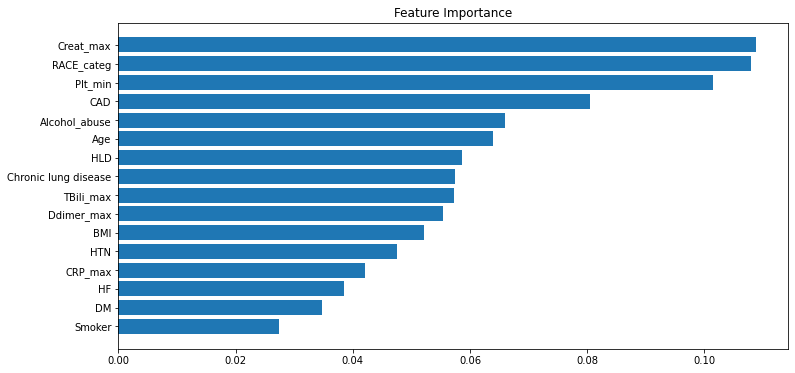

In [ ]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

# Model - Non-Vented Patients

In [ ]:
X = not_vented.drop(columns = ['death', 'SEX', 'Vented'])
y = not_vented['death']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier()

In [ ]:
booster = model.get_booster()
booster.save_model('not_vented_model.bin')

In [ ]:
expected_y  = y_test
predicted_y = model.predict(X_test)

In [ ]:
print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       794
           1       0.38      0.09      0.15        53

    accuracy                           0.93       847
   macro avg       0.66      0.54      0.56       847
weighted avg       0.91      0.93      0.91       847

[[786   8]
 [ 48   5]]


In [ ]:
print(model.predict(X_test))
print(model.predict_proba(X_test))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
model.feature_importances_

array([0.21621566, 0.04659458, 0.04940828, 0.05720626, 0.04247125,
       0.03710728, 0.02230358, 0.07465652, 0.0358783 , 0.05947462,
       0.05863912, 0.0662726 , 0.07531166, 0.05164979, 0.06803734,
       0.0387732 ], dtype=float32)

Text(0.5, 1.0, 'Feature Importance')

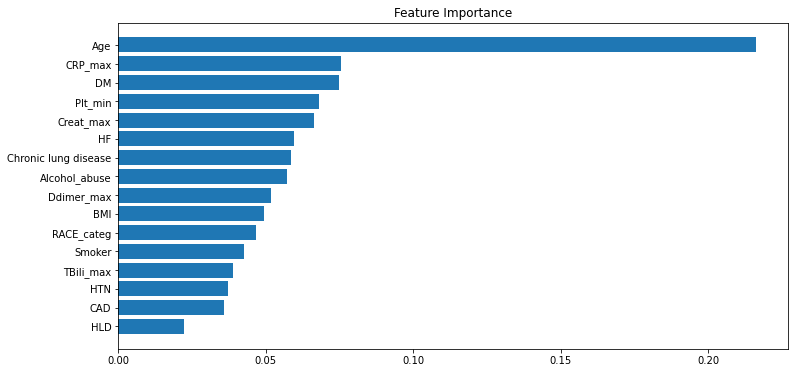

In [ ]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')